# Asignación # 3 de Elementos Finitos Aplicados a la Mecánica de Sólidos
<br>
<center>**Eduardo Vieira**</center>

<center>Universidad Central de Venezuela</center>

<center>Facultad de Ingeniería</center>

<center>Escuela de Ingeniería Mecánica</center>

<center>eduardo.vieira@ucv.ve</center>


## 1. Introducción

En esta tercera asignación de la materia se resolverá el ejercicio propuesto $5.14$ del libro Introducción al Estudio del Elemento Finito en Ingeniería (Tirupathi R. Chandrupatla y Ashok D. Belegundu, 1999, $2^{da}$ Edición en español)

## 2. El Problema

El brazo de la figura es un componente automotriz. Determine la posición y magnitud del esfuerzo maximo de von Mises $\sigma_{vm}$, dado por:

$\sigma_{vm} = \sqrt{\sigma_x^2 - \sigma_x \sigma_y + \sigma_y^2 + 3 \tau_{xy}^2}$

<img src="./problema.png">
<center>*Figura 1: Brazo a estudiar*</center>

## 3. Datos

+ t = 1.0 [cm]
+ E = 200e9 [N/m2]
+ $\nu$ = 0.3

In [1]:
t = 0.01
E = 200e9
v = 0.3

Primero realizamos el dibujo en un programa CAD (BricsCAD 16.01 Linux con licencia académica)

<img src="./bricscad.png">

Realizamos el mallado

<img src="./bricscad_malla.png">

Importamos las librerías a utilizar

In [2]:
# Importamos la division y la función print de python 3 (estamos en python 2)
from __future__ import division, print_function

# Importamos la librería de análisis de datos
import pandas as pd

# Importams la librería numérica de python
import numpy as np

# Visualizacion en HTML
from IPython.display import display

# Establecemos en el número maximo de filas y columnas para las tablas
pd.set_option("display.max_rows",20)

Leemos los datos generados por el programa BricsCAD en el archivo csv (comma separated values) data.csv y lo introducimos en una tabla llamada data

In [3]:
data = pd.read_csv("./data.csv", sep = ";")

In [4]:
display(data)

,Número,Nombre,Punto inicial X,Punto inicial Y,Punto inicial Z,Punto final X,Punto final Y,Punto final Z
0,1,Línea,0.070000,0.000000,0.0,0.080000,0.010000,0.0
1,1,Línea,0.070000,0.000000,0.0,0.080000,-0.010000,0.0
2,1,Línea,0.345000,0.010000,0.0,0.355000,0.000000,0.0
3,1,Línea,0.355000,0.000000,0.0,0.345000,-0.010000,0.0
4,1,Línea,0.420000,0.025000,0.0,0.402322,0.017678,0.0
5,1,Línea,0.402322,0.017678,0.0,0.395000,0.000000,0.0
6,1,Línea,0.395000,0.000000,0.0,0.402322,-0.017678,0.0
7,1,Línea,0.402322,-0.017678,0.0,0.420000,-0.025000,0.0
8,1,Línea,0.420000,-0.025000,0.0,0.437678,-0.017678,0.0
9,1,Línea,0.437678,-0.017678,0.0,0.445000,0.000000,0.0


Eliminamos la columnas innecesarias y generamos un índice que comience en 1

In [5]:
# Elimino las columnas 0, 1, 4 y 7
data = data.drop(data.columns[[0, 1, 4, 7]], axis=1)

# Genero un nuevo índice comenzando en 1
data.index = np.arange(1, len(data) + 1)
display(data)

,Punto inicial X,Punto inicial Y,Punto final X,Punto final Y
1,0.070000,0.000000,0.080000,0.010000
2,0.070000,0.000000,0.080000,-0.010000
3,0.345000,0.010000,0.355000,0.000000
4,0.355000,0.000000,0.345000,-0.010000
5,0.420000,0.025000,0.402322,0.017678
6,0.402322,0.017678,0.395000,0.000000
7,0.395000,0.000000,0.402322,-0.017678
8,0.402322,-0.017678,0.420000,-0.025000
9,0.420000,-0.025000,0.437678,-0.017678
10,0.437678,-0.017678,0.445000,0.000000


De la tabla anterior buscaremos cada uno de los distintos nodos. El siguiente código busca en la tabla anterior (data) agregando los puntos que no esten presentes en la tabla de coordenadas nodales

In [6]:
# Creamos el arreglo de coordenadas nodales:
coord_nod = pd.DataFrame({"X": np.zeros(100),
                          "Y": np.zeros(100)})

# Creamos un índice que comience en 1
coord_nod.index = np.arange(1, len(coord_nod) + 1)

# Introducimos el primer punto
coord_nod.loc[1,"X"] = data.loc[1, "Punto inicial X"]
coord_nod.loc[1,"Y"] = data.loc[1, "Punto inicial Y"]

# Indice de puntos asignados en la tabla de coordenadas nodales
k = 2

# Buscamos en los puntos iniciales
for i in data.index:
    existente = False
    for j in coord_nod.index:
        if ((coord_nod.loc[j, "X"] == data.loc[i, "Punto inicial X"]) and 
            (coord_nod.loc[j, "Y"] == data.loc[i, "Punto inicial Y"])):
            existente = True
    if existente == False:
        coord_nod.loc[k, "X"] = data.loc[i, "Punto inicial X"]
        coord_nod.loc[k, "Y"] = data.loc[i, "Punto inicial Y"]
        k = k + 1

# Buscamos en los puntos finales
for i in data.index:
    existente = False
    for j in coord_nod.index:
        if ((coord_nod.loc[j, "X"] == data.loc[i, "Punto final X"]) and 
            (coord_nod.loc[j, "Y"] == data.loc[i, "Punto final Y"])):
            existente = True
    if existente == False:
        coord_nod.loc[k, "X"] = data.loc[i, "Punto final X"]
        coord_nod.loc[k, "Y"] = data.loc[i, "Punto final Y"]
        k = k + 1
      
# Cortamos la tabla original
coord_nod = coord_nod[:k-1]
display(coord_nod)

,X,Y
1,0.070000,0.000000
2,0.345000,0.010000
3,0.355000,0.000000
4,0.420000,0.025000
5,0.402322,0.017678
6,0.395000,0.000000
7,0.402322,-0.017678
8,0.420000,-0.025000
9,0.437678,-0.017678
10,0.445000,0.000000


In [7]:
conectividad = pd.DataFrame({"Inicial": np.zeros(len(data),dtype=int),
                             "Final":   np.zeros(len(data),dtype=int)},
                             index = np.arange(1, len(data) + 1))

for i in data.index:
    for j in coord_nod.index:
        if ((coord_nod.loc[j, "X"] == data.loc[i, "Punto inicial X"]) and 
            (coord_nod.loc[j, "Y"] == data.loc[i, "Punto inicial Y"])):
            conectividad.loc[i, "Inicial"] = j
        
        if ((coord_nod.loc[j, "X"] == data.loc[i, "Punto final X"]) and 
            (coord_nod.loc[j, "Y"] == data.loc[i, "Punto final Y"])):
            conectividad.loc[i, "Final"] = j

conectividad

,Final,Inicial
1,32,1
2,33,1
3,3,2
4,34,3
5,5,4
6,6,5
7,7,6
8,8,7
9,9,8
10,10,9



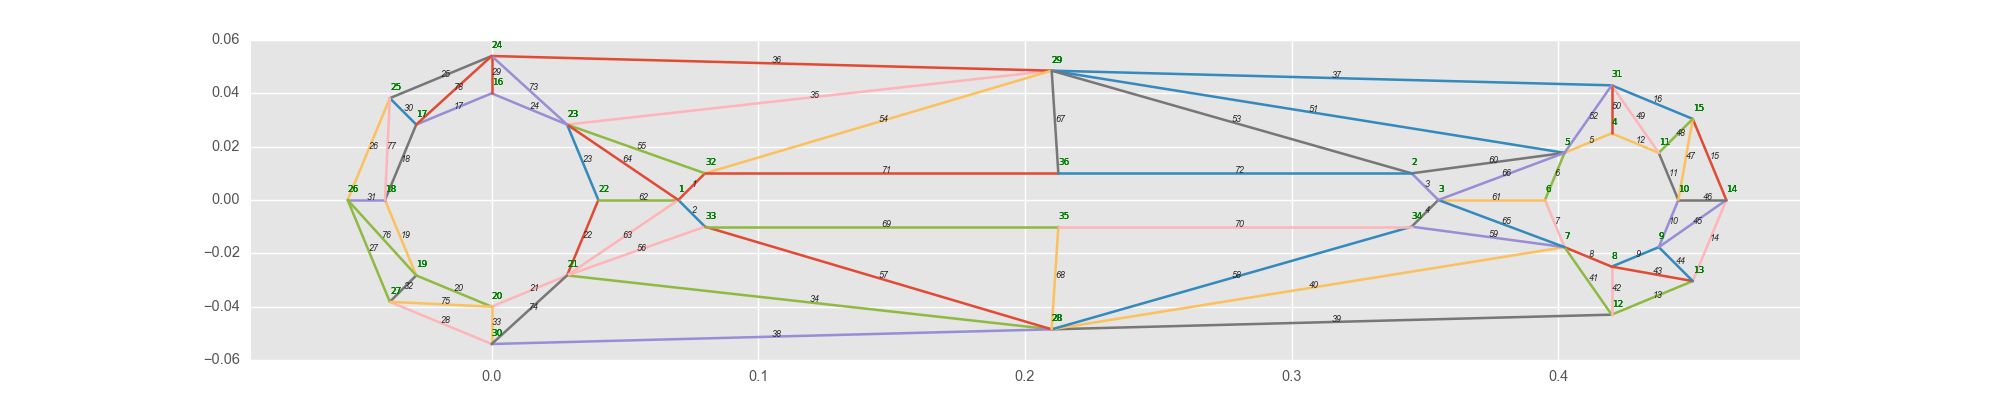

In [65]:
import matplotlib.pyplot as plt
%matplotlib nbagg
fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

for i in data.index:
    x = [data.loc[i, "Punto inicial X"],data.loc[i, "Punto final X"]]
    y = [data.loc[i, "Punto inicial Y"],data.loc[i, "Punto final Y"]]
    ax.plot(x, y, label="Linea"+str(i+1))
    
    ax.text((x[0]+x[1])/2, (y[0]+y[1])/2, str(i), style='italic', fontsize=8)
    ax.text(x[0], y[0]+0.003, str(int(conectividad.loc[i,"Inicial"])), fontsize=8,color='green')
    ax.text(x[1], y[1]+0.003, str(int(conectividad.loc[i,"Final"])), fontsize=8,color='green')
    
ax.axis('equal')
plt.show()

In [11]:
elementos = pd.DataFrame({"1": np.zeros(400),
                          "2": np.zeros(400),
                          "3": np.zeros(400)},
                          index = np.arange(1, 401))

from numba import jit
@jit
def busca_elementos():
    n = 0
    for i in conectividad.index:
        for j in conectividad.index:
            if (i != j and (conectividad.loc[i,"Final"]==conectividad.loc[j,"Final"] or 
                            conectividad.loc[i,"Inicial"]==conectividad.loc[j,"Inicial"] or
                            conectividad.loc[i,"Final"]==conectividad.loc[j,"Inicial"] or
                            conectividad.loc[i,"Inicial"]==conectividad.loc[j,"Final"])):
                if (conectividad.loc[i,"Final"]==conectividad.loc[j,"Final"] or 
                    conectividad.loc[i,"Final"]==conectividad.loc[j,"Inicial"]):
                    aux = conectividad.loc[i,"Final"]
                if (conectividad.loc[i,"Inicial"]==conectividad.loc[j,"Inicial"] or 
                   conectividad.loc[i,"Inicial"]==conectividad.loc[j,"Final"]):
                    aux = conectividad.loc[i,"Inicial"]
                for k in conectividad.index:
                    if (i != k and j != k and ((conectividad.loc[i,"Final"]==conectividad.loc[k,"Final"] or 
                                                conectividad.loc[i,"Inicial"]==conectividad.loc[k,"Inicial"] or
                                                conectividad.loc[i,"Final"]==conectividad.loc[k,"Inicial"] or
                                                conectividad.loc[i,"Inicial"]==conectividad.loc[k,"Final"]))):
    
                        if (conectividad.loc[j,"Final"]==conectividad.loc[k,"Final"] or 
                            conectividad.loc[j,"Inicial"]==conectividad.loc[k,"Inicial"] or
                            conectividad.loc[j,"Final"]==conectividad.loc[k,"Inicial"] or
                            conectividad.loc[j,"Inicial"]==conectividad.loc[k,"Final"]):
                            if conectividad.loc[k,"Inicial"] != aux and conectividad.loc[k,"Final"] != aux:
                                lista = list([i, j, k])
                                lista.sort()
                                elementos.loc[n] = lista
                                n = n + 1
    return n

m = busca_elementos()
elementos = elementos.loc[:m-1]
elementos

,1,2,3
1,1.0,55.0,64.0
2,2.0,56.0,63.0
3,2.0,56.0,63.0
4,3.0,60.0,66.0
5,3.0,60.0,66.0
6,4.0,59.0,65.0
7,4.0,59.0,65.0
8,5.0,50.0,52.0
9,5.0,50.0,52.0
10,6.0,61.0,66.0


In [16]:
elementos = elementos.drop_duplicates()
elementos.index = range(1, len(elementos)+1)
elementos

,1,2,3
1,1.0,55.0,64.0
2,2.0,56.0,63.0
3,3.0,60.0,66.0
4,4.0,59.0,65.0
5,5.0,50.0,52.0
6,6.0,61.0,66.0
7,7.0,61.0,65.0
8,8.0,41.0,42.0
9,9.0,43.0,44.0
10,10.0,45.0,46.0


In [17]:
# Calculamos la matriz de propiedades del material
D = (E /(1 - v**2)) * np.array([
        [1, v, 0],
        [v, 1, 0],
        [0, 0, (1-v)/2]
    ])
D

array([[  2.19780220e+11,   6.59340659e+10,   0.00000000e+00],
       [  6.59340659e+10,   2.19780220e+11,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   7.69230769e+10]])

In [18]:
def matriz_k(elemento):
    
    elemento_1 = elementos.loc[elemento, "1"]
    elemento_2 = elementos.loc[elemento, "2"]
    elemento_3 = elementos.loc[elemento, "3"]
    
    
    lista_puntos = np.array([conectividad.loc[elemento_1,"Inicial"], conectividad.loc[elemento_1,"Final"],
                            conectividad.loc[elemento_2,"Inicial"], conectividad.loc[elemento_2,"Final"],
                            conectividad.loc[elemento_3,"Inicial"], conectividad.loc[elemento_3,"Final"]])
    lista_puntos = np.unique(lista_puntos)
                            
    punto_1 = lista_puntos[0]
    punto_2 = lista_puntos[1]
    punto_3 = lista_puntos[2]
    
    x1 = coord_nod.loc[punto_1, "X"]
    x2 = coord_nod.loc[punto_2, "X"]
    x3 = coord_nod.loc[punto_3, "X"]
    y1 = coord_nod.loc[punto_1, "Y"]
    y2 = coord_nod.loc[punto_2, "Y"]
    y3 = coord_nod.loc[punto_3, "Y"]
    
    det_J = (x3 - x1) * (y3 - y2) - (x3 - x2) * (y3 - y1)
    
    B = np.array([
            [(y2 - y3),         0, (y3 - y1),         0, (y1 - y2),         0],
            [        0, (x3 - x2),         0, (x1 - x3),         0, (x2 - x1)],
            [(x3 - x2), (y2 - y3), (x1 - x3), (y3 - y1), (x2 - x1), (y1 - y2)]
        ])
    
    # Cálculo del área con la fórmula de herón
    a = np.sqrt((x2-x1) ** 2 + (y2 - y1) ** 2)
    b = np.sqrt((x3-x1) ** 2 + (y3 - y1) ** 2)
    c = np.sqrt((x3-x2) ** 2 + (y3 - y2) ** 2)
    s = (a + b + c) / 2
    A = np.sqrt(s * (s - a) * (s - b) * (s - c))
    
    # Cálculo de la matriz k del elemento
    k = t * A * np.dot(np.transpose(B),np.dot(D, B))
    
    tabla_k = pd.DataFrame(k,
                          index = [2 * punto_1 - 1, 2 * punto_1,
                                   2 * punto_2 - 1, 2 * punto_2,
                                   2 * punto_3 - 1, 2 * punto_3],
                          columns = [2 * punto_1 - 1, 2 * punto_1,
                                     2 * punto_2 - 1, 2 * punto_2,
                                     2 * punto_3 - 1, 2 * punto_3])
    
    return tabla_k

In [19]:
matriz_k_estructura = pd.DataFrame(np.zeros((2*len(coord_nod),2*len(coord_nod))),
                                   index = range(1, 2*len(coord_nod) +1),
                                   columns = range(1, 2*len(coord_nod) +1))
for i in elementos.index:
    k_elemento = matriz_k(i)
    for j in k_elemento.index:
        for k in k_elemento.columns:
            matriz_k_estructura.loc[j,k] = matriz_k_estructura.loc[j,k] + k_elemento.loc[j,k]

#matriz_k_estructura

In [20]:
# Cargas
F = pd.DataFrame(np.zeros(len(matriz_k_estructura)),
                 index = range(1,len(matriz_k_estructura)+1))
# 5000 [N] en el nodo 31 en dirección Y positiva
F.loc[2 * 31 - 1] = 5000
# 2800 [N] en el nodo 14 en dirección X positiva
F.loc[2 * 14 - 2] = 2800

In [21]:
# Eliminamos los gdl de los nodos fijos 16, 17, 18, 19, 20, 21, 22, 23
lista_gdl = []
for i in [16, 17, 18, 19, 20, 21, 22, 23]:
    lista_gdl.append(2 * i-1)
    lista_gdl.append(2 * i)
# Eliminamos las filas
matriz_k_estructura_sin_rest =matriz_k_estructura.drop(lista_gdl, axis = 0)
# Eliminamos la columnas
matriz_k_estructura_sin_rest =matriz_k_estructura_sin_rest.drop(lista_gdl, axis = 1)
matriz_k_estructura_sin_rest.shape

(56, 56)

In [22]:
# Lo mismo con la carga
F_sin_rest =F.drop(lista_gdl)
F_sin_rest.shape

(56, 1)

In [23]:
# para resolver importamos el módulo solve de la librería scipy.linag
from scipy.linalg import solve

# creamos la matriz de fuerza

# resolvemos el problema F = kU obteniendo el desplazamiento
desp = solve(matriz_k_estructura_sin_rest.values,F_sin_rest.values)

# Lo introducimos en una tabla
tabla_desp = pd.DataFrame(desp, index=np.arange(1, len(desp) + 1), columns=["Desplazamiento"])

# Insertamos los desplazmientos nulos (restricciones)
tabla_desp_parte_1 = tabla_desp.loc[:30]
tabla_desp_parte_2 = tabla_desp.loc[31:]
tabla_insert = pd.DataFrame([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], columns=["Desplazamiento"])
tabla_desp_concat = pd.concat([tabla_desp_parte_1, tabla_insert, tabla_desp_parte_2], ignore_index=True)
tabla_desp_concat.index = np.arange(1, len(tabla_desp_concat) + 1)
tabla_desp_concat

,Desplazamiento
1,0.059165
2,6.139944
3,2.634294
4,49.232311
5,0.430044
6,50.813801
7,1.001201
8,62.269277
9,1.497853
10,58.253535


In [24]:
def calculo_esf(elemento):
    elemento_1 = elementos.loc[elemento, "1"]
    elemento_2 = elementos.loc[elemento, "2"]
    elemento_3 = elementos.loc[elemento, "3"]
    
    
    lista_puntos = np.array([conectividad.loc[elemento_1,"Inicial"], conectividad.loc[elemento_1,"Final"],
                            conectividad.loc[elemento_2,"Inicial"], conectividad.loc[elemento_2,"Final"],
                            conectividad.loc[elemento_3,"Inicial"], conectividad.loc[elemento_3,"Final"]])
    lista_puntos = np.unique(lista_puntos)
                            
    punto_1 = lista_puntos[0]
    punto_2 = lista_puntos[1]
    punto_3 = lista_puntos[2]
    
    desp_x_1 = tabla_desp_concat.loc[2 * punto_1 - 1, "Desplazamiento"]
    desp_y_1 = tabla_desp_concat.loc[2 * punto_1, "Desplazamiento"]
    desp_x_2 = tabla_desp_concat.loc[2 * punto_2 - 1, "Desplazamiento"]
    desp_y_2 = tabla_desp_concat.loc[2 * punto_2, "Desplazamiento"]
    desp_x_3 = tabla_desp_concat.loc[2 * punto_3 - 1, "Desplazamiento"]
    desp_y_3 = tabla_desp_concat.loc[2 * punto_3, "Desplazamiento"]
    
    q = np.array([desp_x_1,desp_y_1,desp_x_2,desp_y_2,desp_x_3,desp_y_3])
    
    x1 = coord_nod.loc[punto_1, "X"]
    x2 = coord_nod.loc[punto_2, "X"]
    x3 = coord_nod.loc[punto_3, "X"]
    y1 = coord_nod.loc[punto_1, "Y"]
    y2 = coord_nod.loc[punto_2, "Y"]
    y3 = coord_nod.loc[punto_3, "Y"]
    
    B = np.array([
            [(y2 - y3),         0, (y3 - y1),         0, (y1 - y2),         0],
            [        0, (x3 - x2),         0, (x1 - x3),         0, (x2 - x1)],
            [(x3 - x2), (y2 - y3), (x1 - x3), (y3 - y1), (x2 - x1), (y1 - y2)]
        ])
    
    esfuerzo = np.dot(D,np.dot(B,q))
    return esfuerzo

In [40]:
tabla_esfuerzos = pd.DataFrame()
for i in elementos.index:
    esf = calculo_esf(i)
    normal_x = esf[0]
    cortante_xy = esf[1]
    normal_y = esf[2]
    esf_t=pd.DataFrame({"Normal X": [normal_x],
                        "Cortante XY": [cortante_xy],
                        "Normal Y": [normal_y]})
    tabla_esfuerzos = pd.concat([esf_t,tabla_esfuerzos],ignore_index=True)
    
tabla_esfuerzos.index = range(1, len(tabla_esfuerzos) + 1)
tabla_esfuerzos

,Cortante XY,Normal X,Normal Y
1,1.594751e+08,2.691639e+09,1.246643e+09
2,-5.862849e+08,-2.683629e+09,1.292219e+09
3,-3.952969e+08,-3.884643e+08,-7.783105e+08
4,-1.503033e+07,1.035745e+08,6.091620e+08
5,-3.609386e+08,3.931229e+08,9.215400e+08
6,1.870450e+07,-1.960210e+09,-4.298011e+08
7,2.809720e+08,-3.386148e+09,-2.825820e+08
8,-9.214326e+07,-5.007308e+08,-7.106315e+08
9,-1.012872e+09,1.359362e+09,-1.004478e+09
10,-7.842530e+08,1.472753e+09,-2.272890e+08


In [37]:
def calculo_von_mises(elemento):
    norm_x = tabla_esfuerzos.loc[elemento,"Normal X"]
    cort_xy = tabla_esfuerzos.loc[elemento,"Cortante XY"]
    norm_y = tabla_esfuerzos.loc[elemento,"Normal Y"]
    esf_von_mises = np.sqrt(normal_x ** 2 - normal_x * normal_y + normal_y ** 2 + 3 * cort_xy **2)
    return esf_von_mises

In [41]:
tabla_von_mises = pd.DataFrame()
for i in elementos.index:
    esf = calculo_von_mises(i)
    esf_t=pd.DataFrame({"Von Mises": [esf]})
    tabla_von_mises = pd.concat([esf_t,tabla_von_mises],ignore_index=True)
    
tabla_von_mises.index = range(1, len(tabla_von_mises) + 1)
tabla_von_mises

,Von Mises
1,1.345399e+10
2,1.217850e+10
3,4.122562e+09
4,2.342928e+09
5,6.838332e+09
6,5.536732e+09
7,9.674879e+09
8,5.454263e+09
9,4.057764e+10
10,1.929183e+10



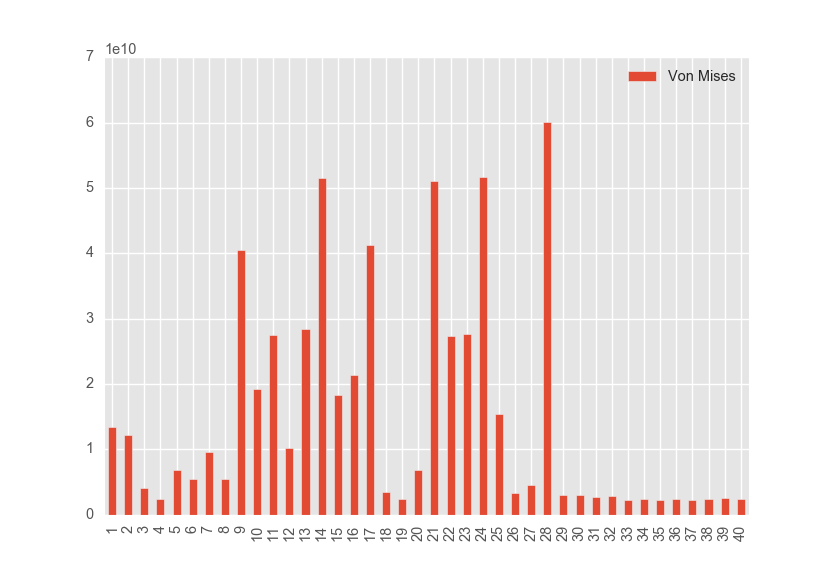

In [63]:
import matplotlib
%matplotlib nbagg
matplotlib.style.use('ggplot')
tabla_von_mises.plot(kind='bar')

In [56]:
matplotlib.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']